In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import KFold
import tensorflow as tf
#Function import
from ipynb.fs.full.autoXRD import normdata
from ipynb.fs.full.autoXRD import normdatasingle
from ipynb.fs.full.autoXRD import augdata
from ipynb.fs.full.autoXRD import exp_augdata
from ipynb.fs.full.autoXRD import exp_data_processing

#Variou import
import pandas as pd
import numpy as np  
from scipy.signal import savgol_filter
from scipy.signal import find_peaks_cwt

(4249, 24)


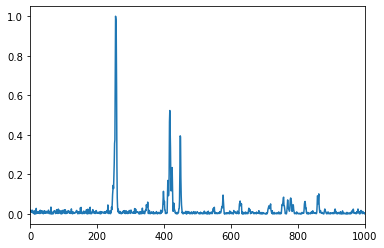

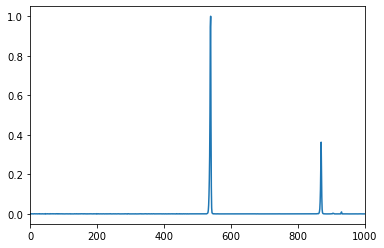

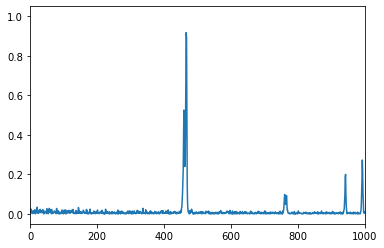

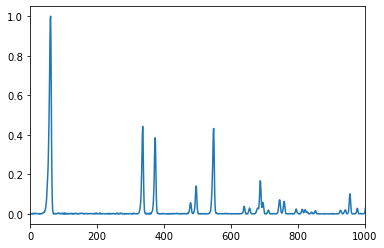

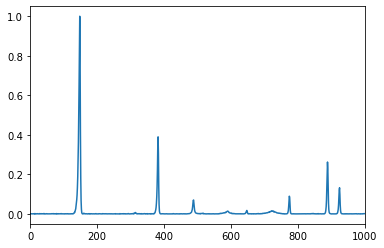

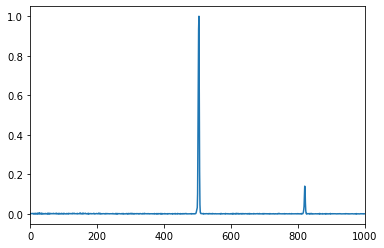

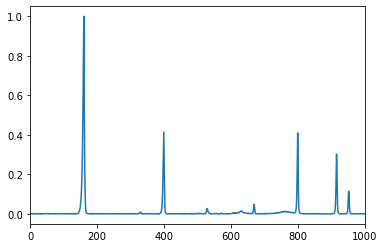

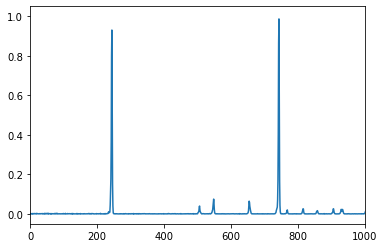

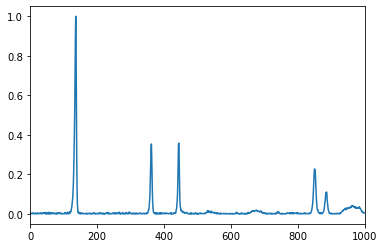

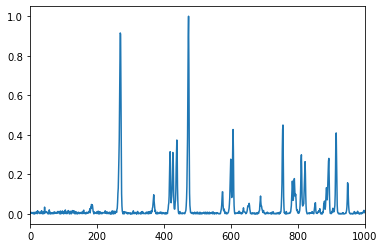

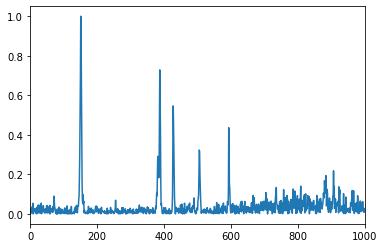

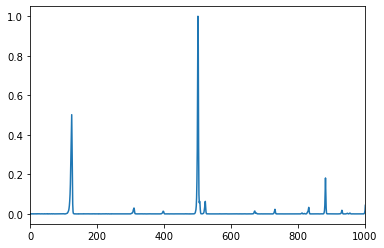

In [2]:
#Load experimental data as dataframe
exp = pd.read_csv('Datasets/exp2_raw.csv', index_col=0)
exp_arr = exp.values
print(exp_arr.shape)

nexp = normdata(exp_arr)

for i in range(0, 12):
    plt.plot(nexp[:,i])
    plt.xlim(0, 1000)
    plt.show()

(4000, 12)


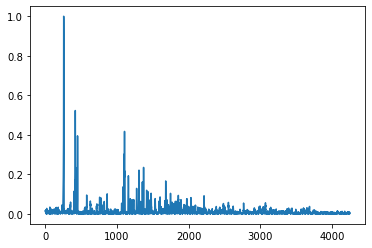

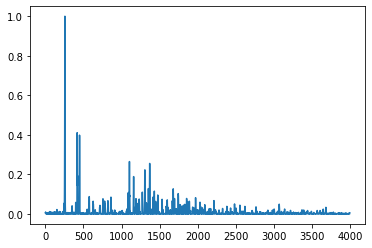

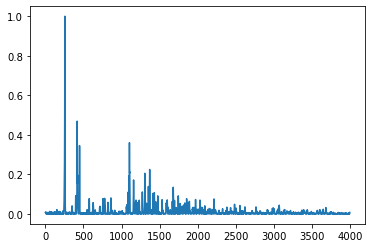

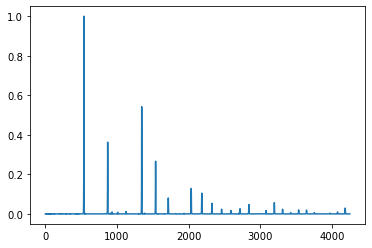

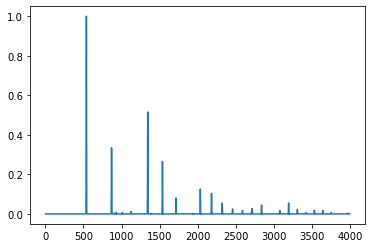

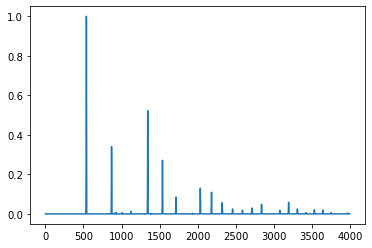

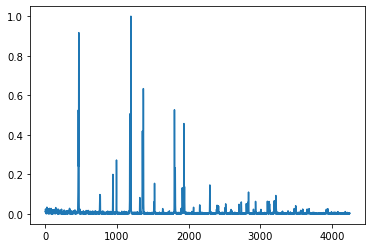

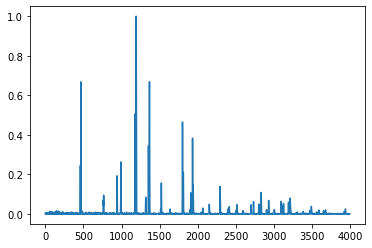

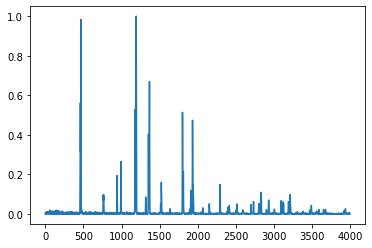

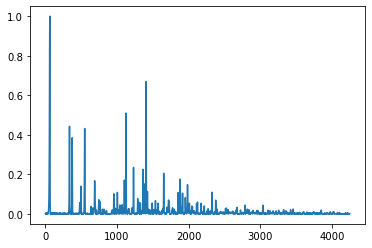

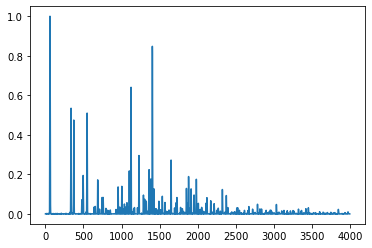

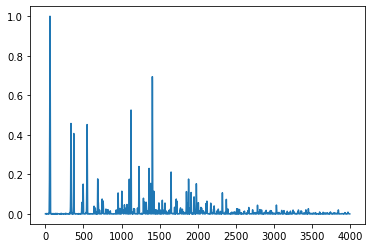

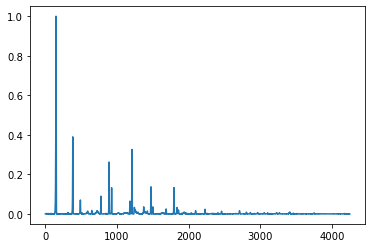

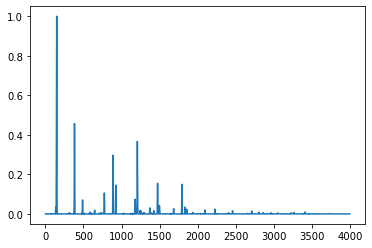

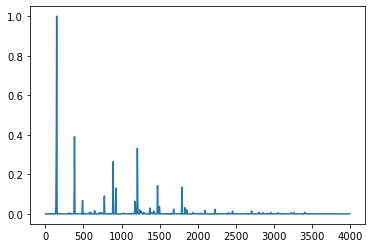

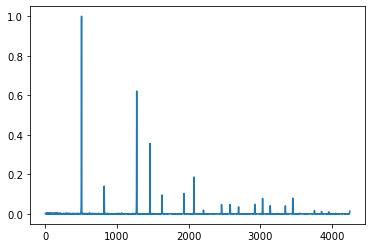

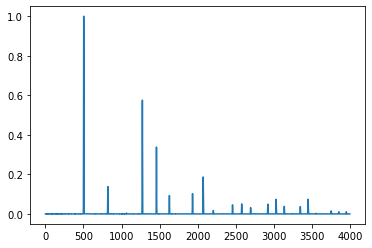

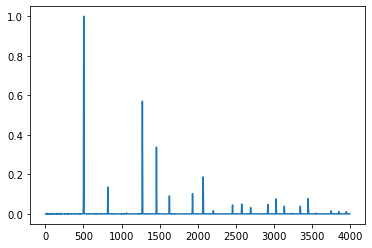

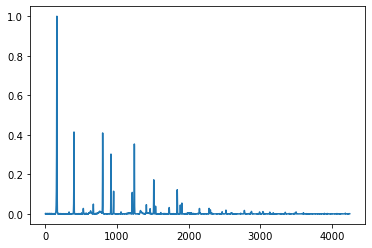

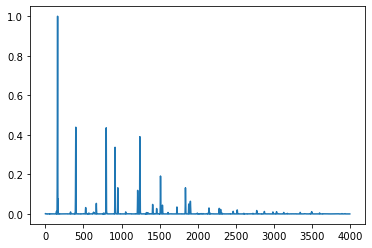

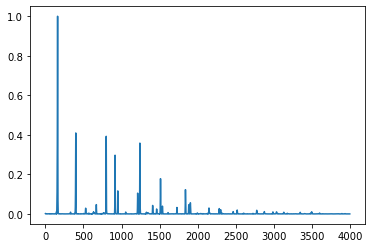

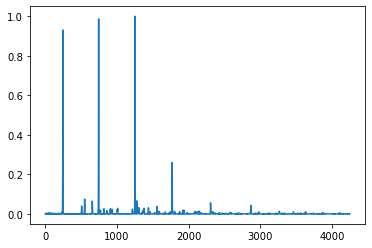

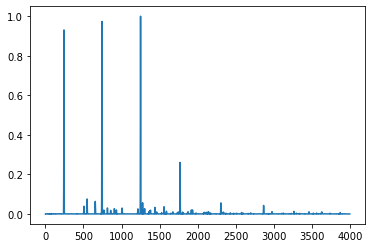

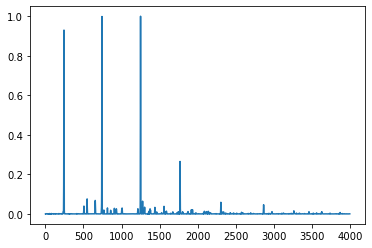

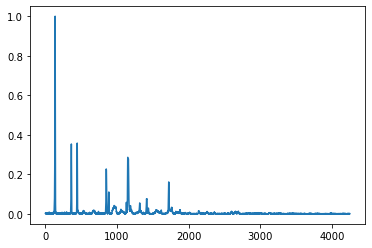

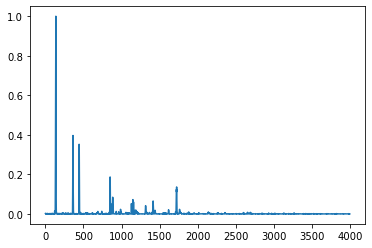

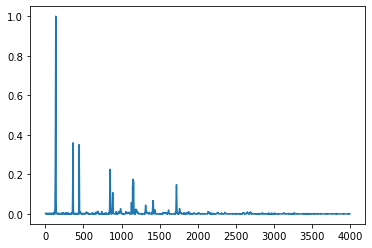

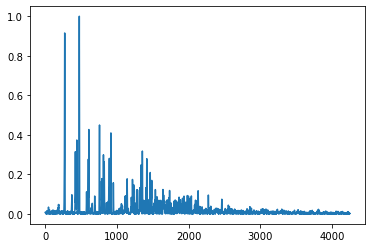

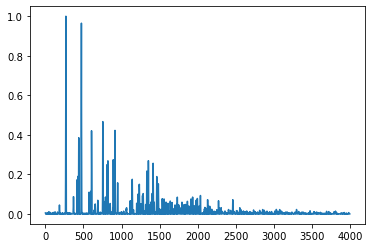

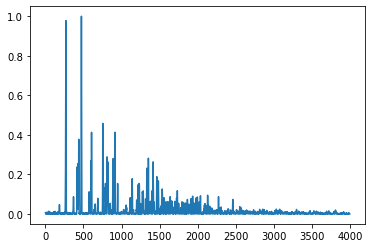

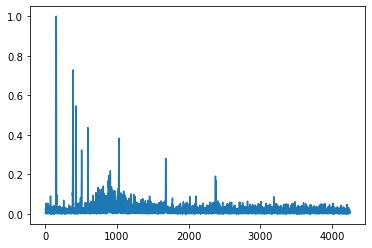

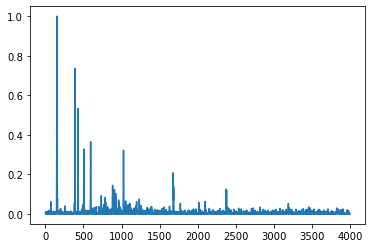

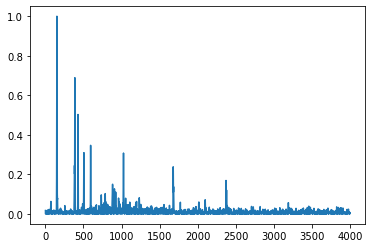

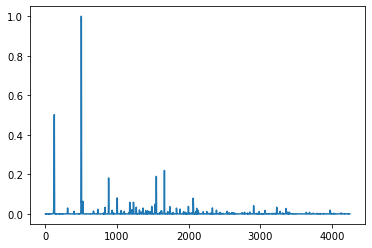

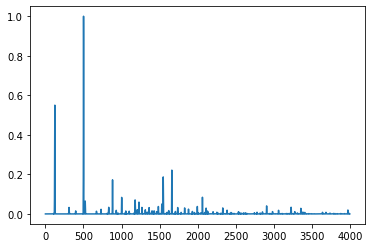

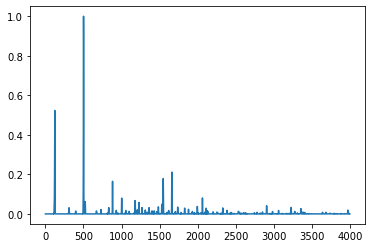

In [5]:
#Manouel
# Define spectral range for exp data preprocess
window = 20
exp_min = 0
exp_max = 4000

minn = 0
maxn = 4000 
theor_min = 0

(len1,w1) = np.shape(nexp)
nexp1 = np.zeros([maxn-minn,w1])
for i in range(w1):
    #savgol_filter to smooth the data
    new1 = savgol_filter(nexp[minn:maxn,i], 3, 1)
    #peak finding
    zf = find_peaks_cwt(new1, np.arange(0.3,0.8), noise_perc=0.001)
    #background substraction
    for j in range(len(zf)-1):
        zf_start= np.maximum(0,zf[j+1]-window//2)
        zf_end = np.minimum(zf[j+1]+window//2,maxn)
        peak = new1[zf_start:zf_end]
             
        #abritaryly remove 1/4 data
        npeak = np.maximum(0,peak-max(np.partition(peak,window//2 )[0:window//2]))
        nexp1[zf_start:zf_end,i] = npeak

print(nexp1.shape)

nexp1 = normdatasingle(nexp1)

#window size for experimental data extraction
theor_max = theor_min+exp_max-exp_min

# Preprocess experimental data
post_exp = normdatasingle(exp_data_processing (nexp, exp_min, exp_max, window))
#print(post_exp.shape)

for i in range(0, 12):
    plt.plot(nexp[:,i])
    plt.show()
    plt.plot(nexp1[:,i])
    plt.show()
    plt.plot(post_exp[:,i])
    plt.show()
#plt.plot(post_exp[:,1])
#plt.show()

In [ ]:
for i in range(2, 5):
    plt.plot(nexp[:,i])
    plt.xlim(0, 1000)
    plt.show()
    plt.plot(post_exp[:,i])
    plt.xlim(0, 1000)
    plt.show()